# 機械学習入門#1 重回帰分析

[参考動画](https://www.youtube.com/watch?v=hQIsJkNSkIo) [参考動画](https://www.youtube.com/watch?v=2G7xzAR4Qas)

決定係数 $ R^2 $\
$$ 
R^2=1-\frac{\sum_{i=1}^{n}(y_i-  \hat{y_i})^2 \quad}{\sum_{i=1}^{n}(y_i- \bar{y_i})^2 \quad}
$$

平均絶対誤差 $ MAE $\
$$
MAE=\frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y_i}|
$$

二乗平均平方根誤差 $ RMSE $\
$$
RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-  \hat{y_i})^2}
$$
<br>
[Jupyter Notebook で数式を美しく書く](https://qiita.com/namoshika/items/63db972bfd1030f8264a)<br>
[Qiitaの数式チートシート](https://qiita.com/PlanetMeron/items/63ac58898541cbe81ada)

In [7]:
import pandas as pd

In [30]:
data_train = pd.read_csv("./data/california_housing_train.csv")
data_test = pd.read_csv("./data/california_housing_test.csv")

In [32]:
#data_train.info()

In [6]:
#学習データ
#不要な変数を削除（住宅価格、緯度、経度を除去）
X_train = data_train.drop(["median_house_value","latitude","longitude"],axis=1)
#目的変数（住宅価格）
y_train = data_train["median_house_value"]

#予測データ
X_test = data_train.drop(["median_house_value","latitude","longitude"],axis=1)
y_test = data_train["median_house_value"]


In [33]:
#データの前処理
from sklearn.preprocessing import StandardScaler

#数値のスケールを合わせる
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)


In [34]:
#モデルを作成する
from sklearn.linear_model import LinearRegression

#重回帰 lin_reg
lin_reg = LinearRegression()
#.fit(入力変数,目的変数)でモデルができる
lin_reg.fit(X_train,y_train)

LinearRegression()

In [35]:
#.coef_で係数が確認できる
lin_reg.coef_

array([ 23333.38642523, -41097.25342291,  37393.73810002, -46819.07369997,
        57086.49698366,  90562.31924108])

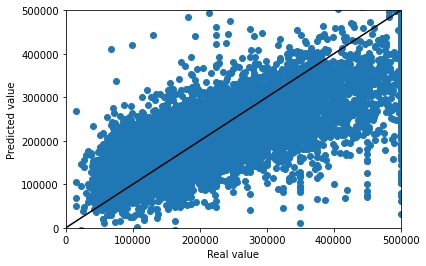

In [36]:
#モデルの性能をテストデータで試す
#.predict(入力変数)で予測ができる
pred_y = lin_reg.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,pred_y)
plt.xlim([0,500000])
plt.ylim([0,500000])
plt.xlabel("Real value")
plt.ylabel("Predicted value")

plt.plot([0,500000],[0,500000],color="black")

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

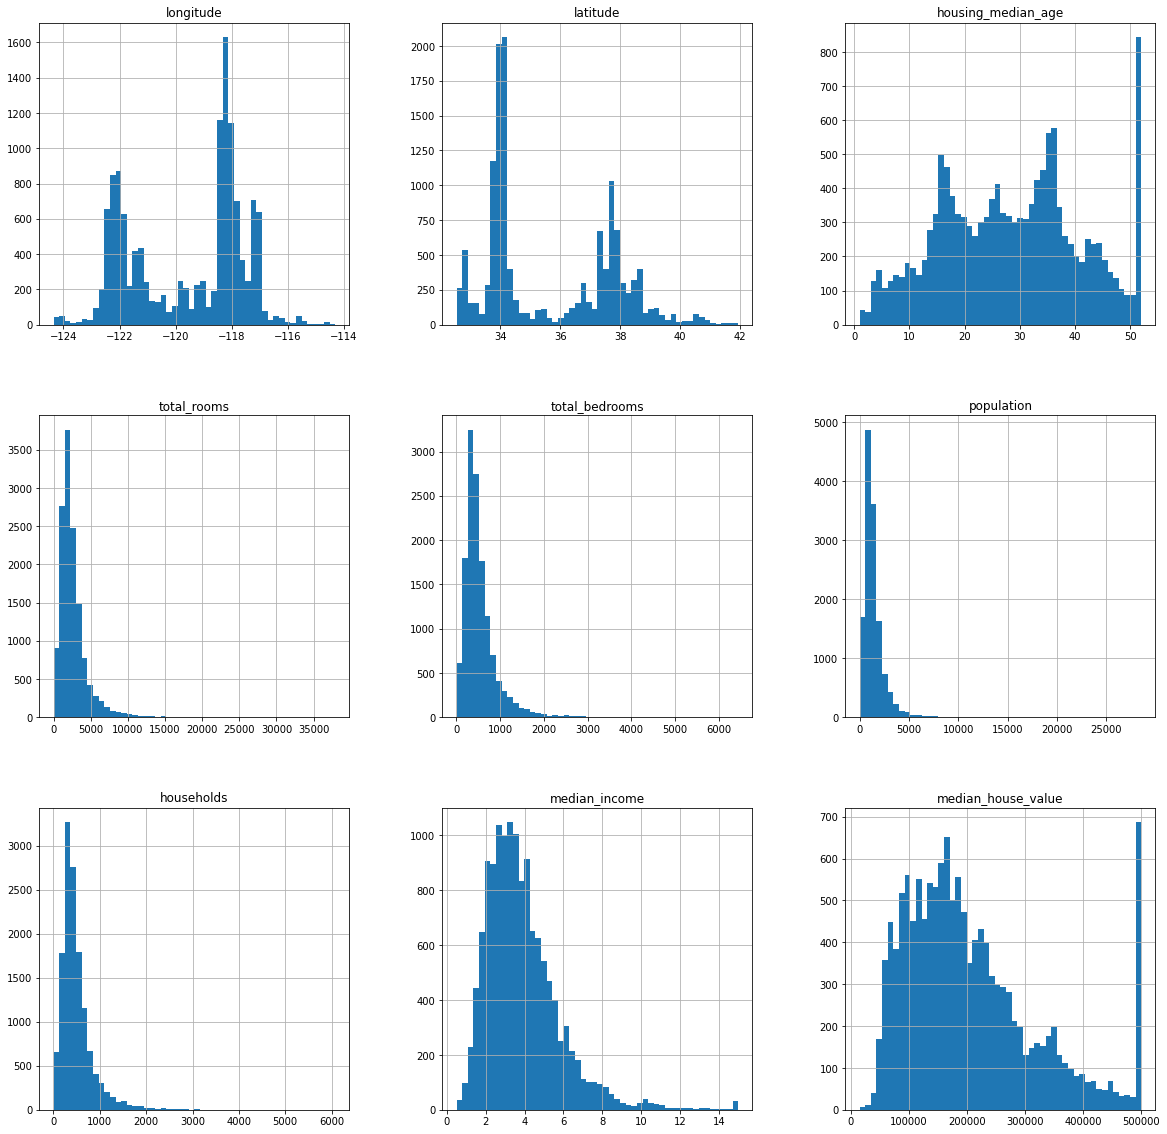

In [37]:
#学習データの分布
data_train.hist(bins=50,figsize=(20,20))

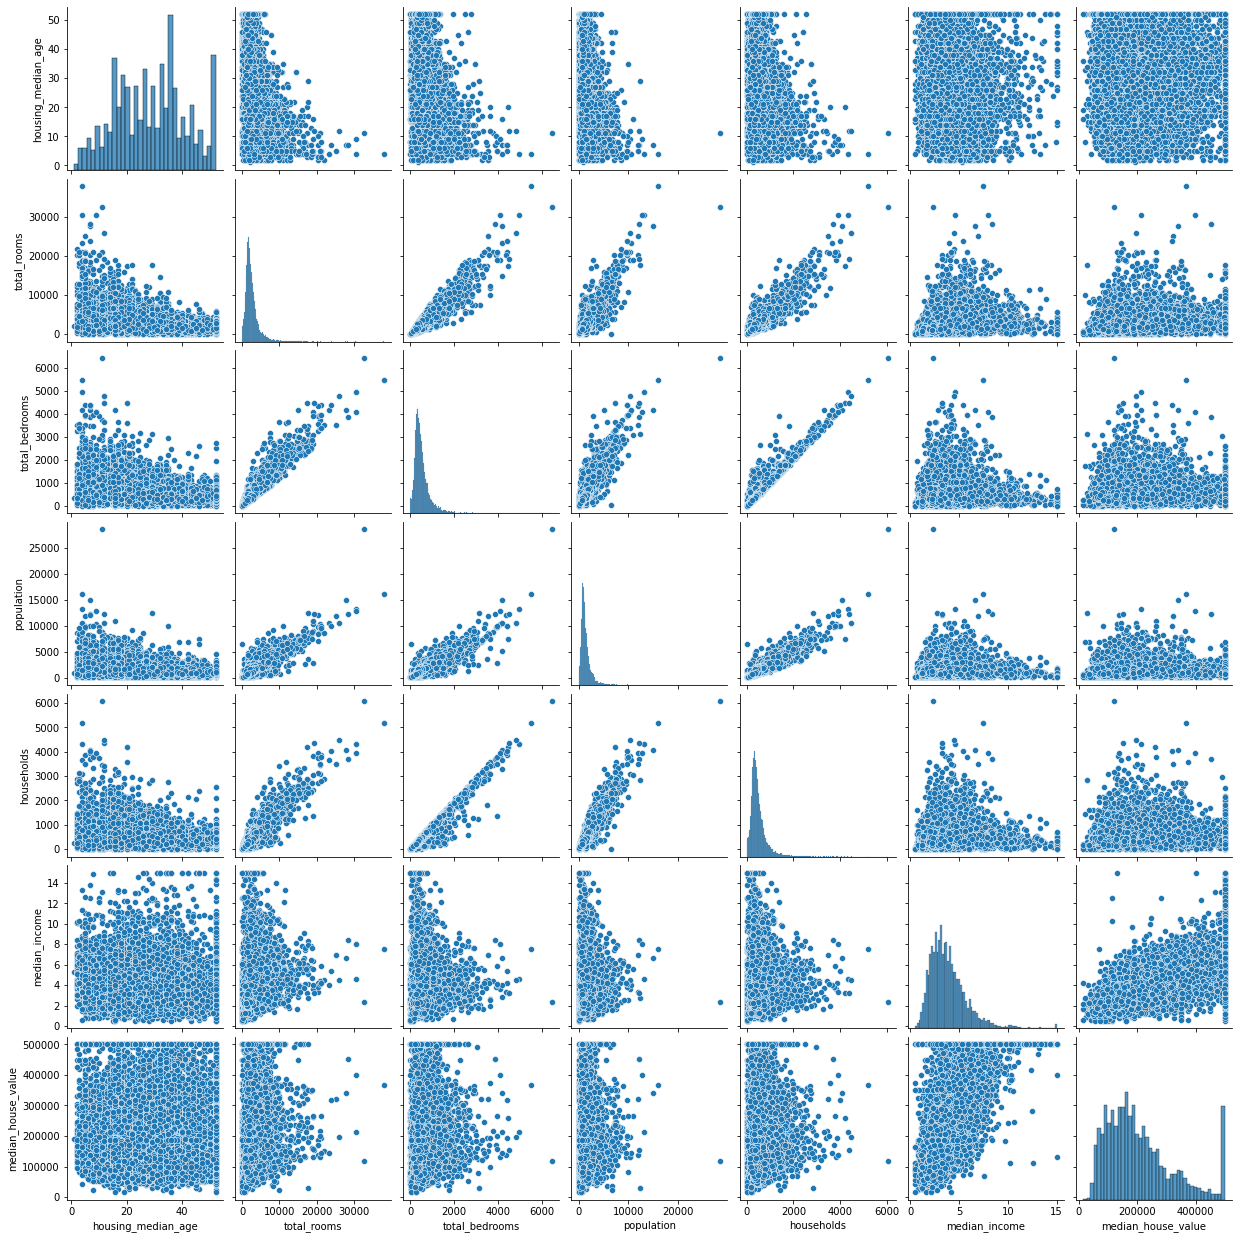

In [38]:
#相関図
import seaborn as sns
sns.pairplot(data_train.drop(["latitude","longitude"],axis=1))

相関のある入力変数を使うとモデルの精度は下がる。「多重共線性」

## 回帰分析の評価指標
モデル精度の指標
- R^2:決定係数（1に近いほど良い）
- MAE:平均絶対誤差（小さいほど良い）
- RMSE:二乗平均平方根誤差（小さいほど良い）